In [1]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../01_preprocess/preprocessed.csv')

# Display the DataFrame
df.head()


,config_name,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,const_enablePrefix,...,cycle,instr,L1_miss,LLC_miss,br_miss,task,scale,IPC,CPU,GHz
0,hash,16,1,0,0,0,1,0,0,1,...,2197.381,1927.571,43.867,21.732,17.802,392.291,5798920.0,0.877,1.0,5.601
1,hash,16,1,0,0,0,1,0,0,1,...,1087.615,1151.517,27.436,9.918,6.127,194.439,10000000.0,1.059,1.0,5.594
2,dense3,16,1,1,0,1,0,0,0,1,...,2744.159,1595.949,63.438,35.138,17.527,481.293,3175985.0,0.582,1.0,5.702
3,dense3,16,1,1,0,1,0,0,0,1,...,2851.194,1227.721,44.438,27.791,13.294,500.832,10000000.0,0.431,1.0,5.693
4,hints,16,1,0,0,0,0,0,0,1,...,2821.450,1500.002,67.185,42.410,17.585,505.257,4683290.0,0.532,1.0,5.584


In [2]:
# Convert 'time' and other fields to numerical if they are not
#df['time'] = pd.to_numeric(df['time'], errors='coerce')

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time']
time_correlation

const_basicHintCount              NaN
const_enableBasicHead             NaN
const_enableDense            0.011647
const_enableDense2                NaN
const_enableDensifySplit     0.011647
const_enableHash            -0.046082
const_enableHashAdapt             NaN
const_enableHeadNode              NaN
const_enablePrefix                NaN
const_hashSimdWidth               NaN
const_hashSortUseStdMerge         NaN
const_hashUseCrc32                NaN
const_hashUseSimd                 NaN
const_headNode4HintCount          NaN
const_headNode8HintCount          NaN
const_pageSizeInner          0.003340
const_pageSizeLeaf          -0.006466
data_size                    0.041641
data_sorted                       NaN
density                     -0.003631
payload_size                      NaN
rand_seed                   -0.002349
ycsb_range_len                    NaN
ycsb_zipf                   -0.264924
time                         1.000000
nodeCount_Leaf               0.061479
nodeCount_In

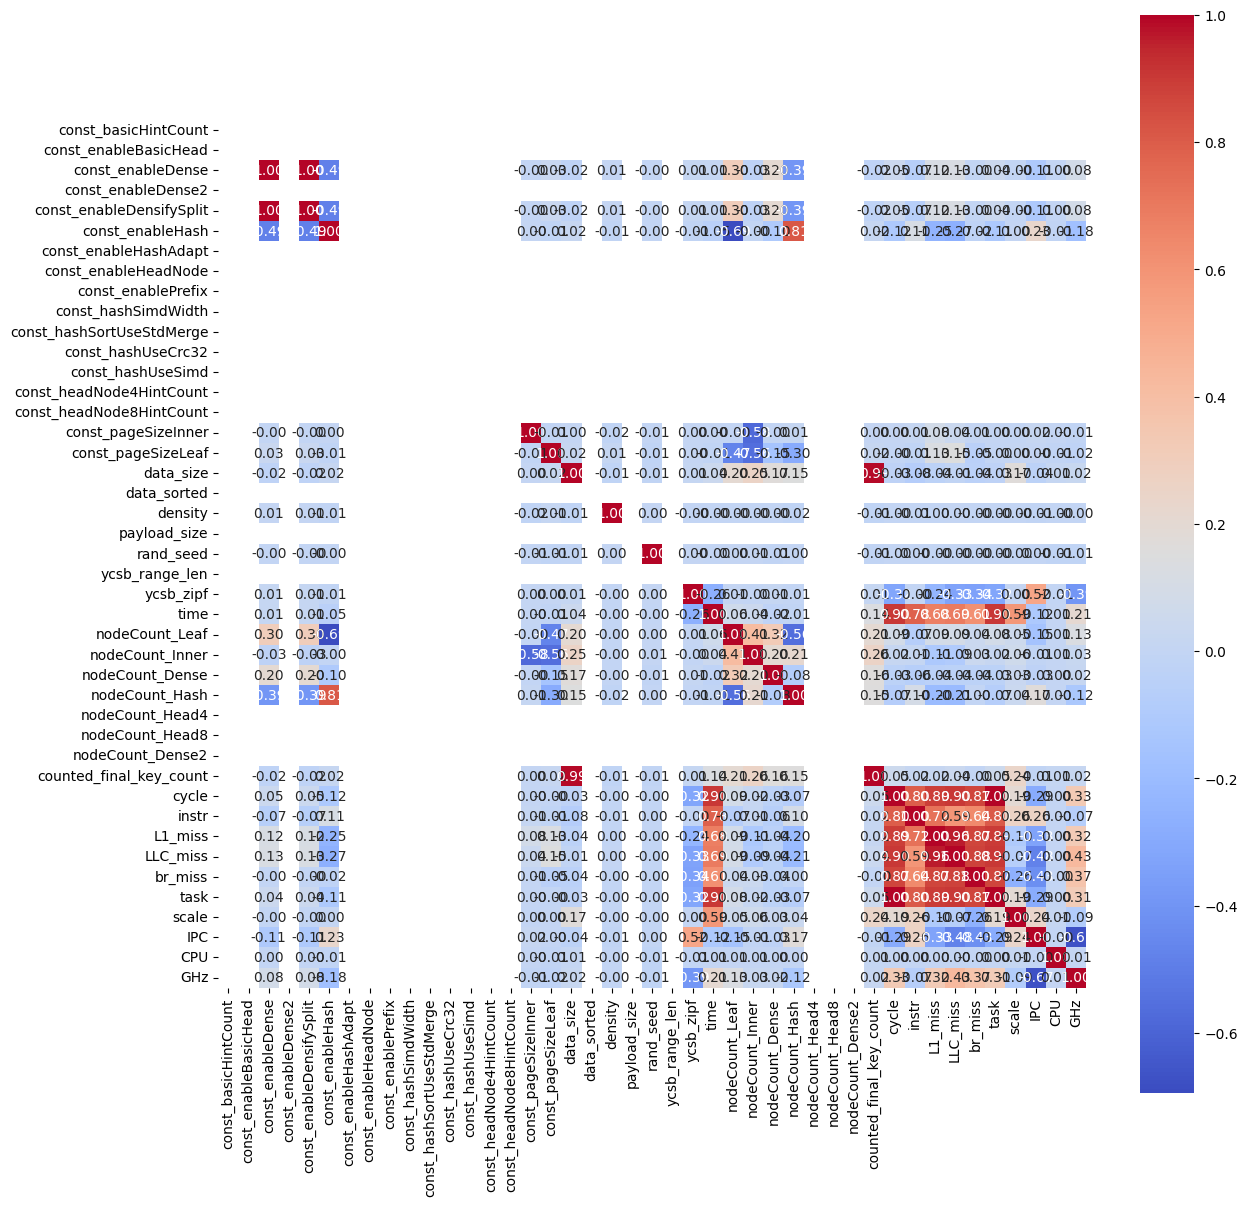

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')

plt.show()

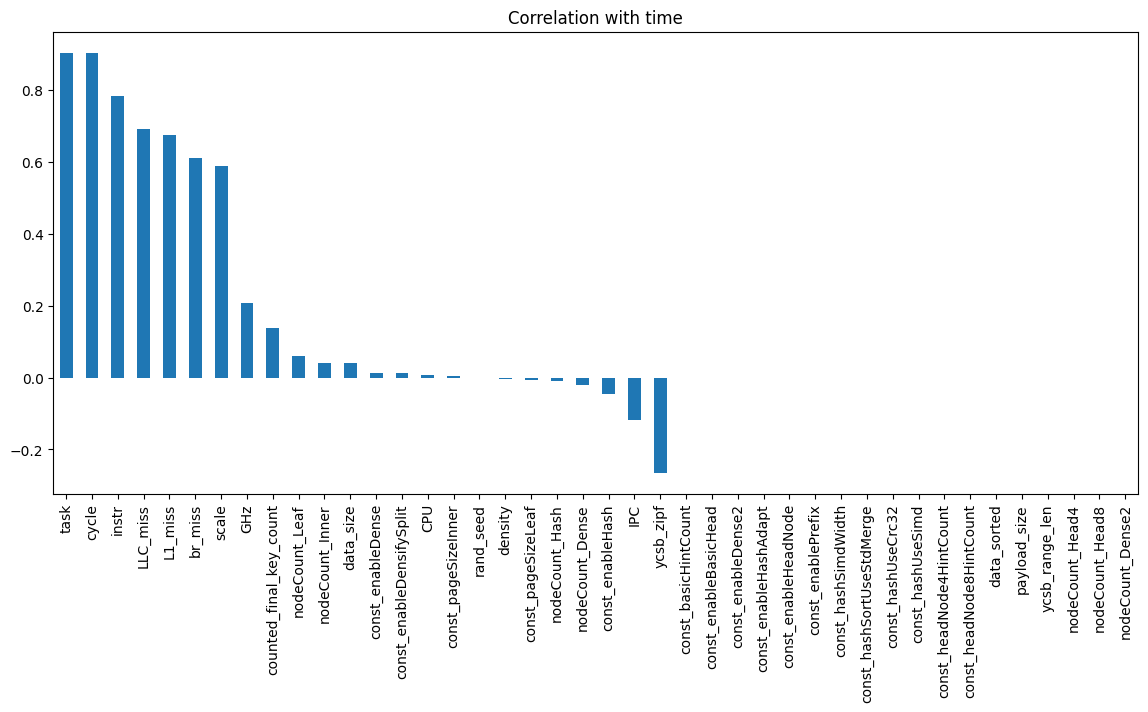

In [4]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time']

# Create a bar plot for 'time' correlation
plt.figure(figsize=(14, 6))
time_correlation.drop('time').sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with time')
plt.show()

Highlight each 10 percentile

In [5]:
# drop output values except time 
df.drop(['cycle', 'instr', 'LLC_miss','CPU','L1_miss', 'br_miss', 'scale', 'counted_final_key_count', 'GHz'], axis=1, inplace=True)
df.head()

,config_name,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,const_enablePrefix,...,time,nodeCount_Leaf,nodeCount_Inner,nodeCount_Dense,nodeCount_Hash,nodeCount_Head4,nodeCount_Head8,nodeCount_Dense2,task,IPC
0,hash,16,1,0,0,0,1,0,0,1,...,2.275,0,846,0,121433,0,0,0,392.291,0.877
1,hash,16,1,0,0,0,1,0,0,1,...,1.944,0,846,0,121433,0,0,0,194.439,1.059
2,dense3,16,1,1,0,1,0,0,0,1,...,1.529,38703,270,0,0,0,0,0,481.293,0.582
3,dense3,16,1,1,0,1,0,0,0,1,...,5.009,38703,270,0,0,0,0,0,500.832,0.431
4,hints,16,1,0,0,0,0,0,0,1,...,2.366,27850,742,0,0,0,0,0,505.257,0.532


In [6]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(['object']).columns

# Apply one-hot encoding to non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_columns)

In [7]:
# Calculate the percentile brackets
df['percentile bracket'] = pd.qcut(df['time'], q=10, labels=False, duplicates='drop') + 1

# Display the updated DataFrame
df.head()


,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,const_enablePrefix,const_hashSimdWidth,...,IPC,config_name_dense3,config_name_hash,config_name_hints,data_name_data/urls,op_ycsb_c,op_ycsb_c_init,op_ycsb_e,op_ycsb_e_init,percentile bracket
0,16,1,0,0,0,1,0,0,1,32,...,0.877,False,True,False,True,False,True,False,False,5
1,16,1,0,0,0,1,0,0,1,32,...,1.059,False,True,False,True,True,False,False,False,4
2,16,1,1,0,1,0,0,0,1,32,...,0.582,True,False,False,True,False,True,False,False,3
3,16,1,1,0,1,0,0,0,1,32,...,0.431,True,False,False,True,True,False,False,False,8
4,16,1,0,0,0,0,0,0,1,32,...,0.532,False,False,True,True,False,False,False,True,6


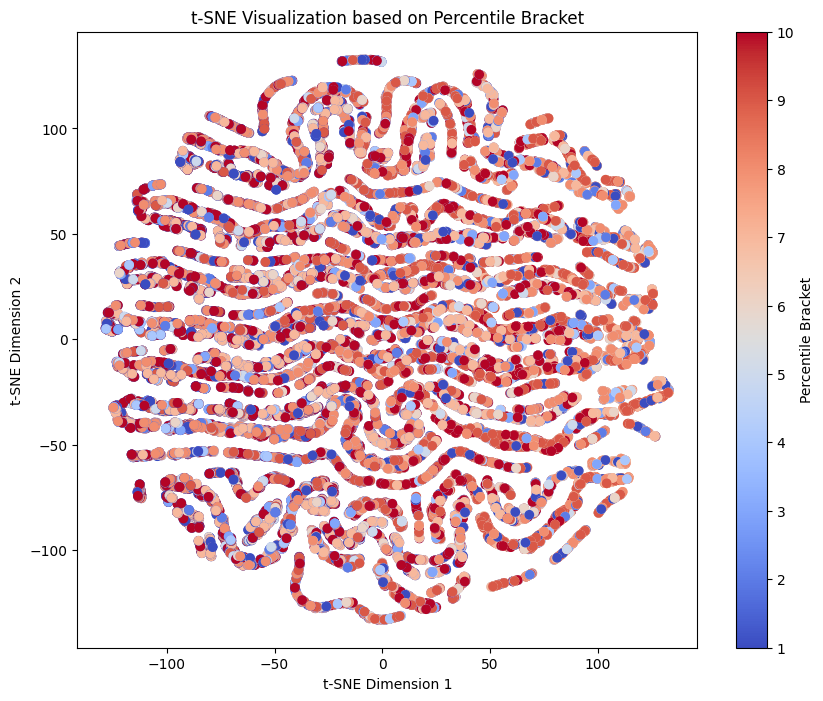

In [8]:
from sklearn.manifold import TSNE

# Create a t-SNE instance
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_data = tsne.fit_transform(df.drop(['time', 'percentile bracket'], axis=1))

# Create a scatter plot of the t-SNE data
plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=df['percentile bracket'], cmap='coolwarm')
plt.colorbar(label='Percentile Bracket')
plt.title('t-SNE Visualization based on Percentile Bracket')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


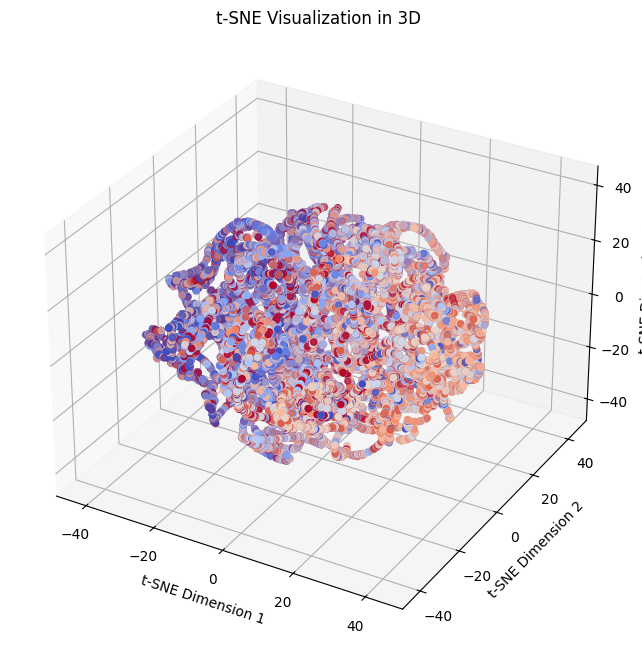

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Run t-SNE algorithm with 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
tsne_data = tsne.fit_transform(df.drop(['time', 'percentile bracket'], axis=1))

# Create a 3D scatter plot of the t-SNE data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=df['percentile bracket'], cmap='coolwarm')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.title('t-SNE Visualization in 3D')
plt.show()
